---

# Arohana-Avarohana Based Classification

---

### Pitch Gradient
The pitch gradient serves as an indicator of whether a particular svara occurs in the **avarohana**, **arohana**, or both within a **raga**.

In [1]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

2025-04-11 11:21:49.322487: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 11:21:49.478451: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744363309.556302   24407 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744363309.573273   24407 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744363309.715029   24407 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Load dataset

In [2]:
X = np.load('../dataset/slopes.npy')
y = np.load('../dataset/labels.npy')
classes = np.load('../dataset/mappings.npy')

In [3]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (36262, 73)
y shape: (36262, 40)


## Train-test split

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [5]:
static_input = keras.layers.Input(shape=(X.shape[1],))

In [6]:
x = keras.layers.Dense(512, activation='relu')(static_input)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)
output = keras.layers.Dense(y.shape[1], activation='softmax')(x)

model = keras.models.Model(static_input, outputs=output)

I0000 00:00:1744363462.986117   24407 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 73)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        37,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 40)             │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,416 (2.07 MB)

 Trainable params: 541,416 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [8]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50


I0000 00:00:1744363650.809607   24997 service.cc:152] XLA service 0x7f12a40235e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744363650.809686   24997 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-04-11 11:27:30.858944: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1744363651.114193   24997 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-04-11 11:27:32.187888: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_299_0', 44 bytes spill stores, 44 bytes spill loads

2025-04-11 11:27:32.269983: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusi

 76/794 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0420 - loss: 3.6487

I0000 00:00:1744363656.332691   24997 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


786/794 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0601 - loss: 3.5557

2025-04-11 11:27:38.550915: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_299', 64 bytes spill stores, 64 bytes spill loads

2025-04-11 11:27:38.883020: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1003', 8 bytes spill stores, 8 bytes spill loads



794/794 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0602 - loss: 3.5550

2025-04-11 11:27:42.973404: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_76', 484 bytes spill stores, 484 bytes spill loads

2025-04-11 11:27:43.086356: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_76_0', 44 bytes spill stores, 44 bytes spill loads

2025-04-11 11:27:45.298065: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_69', 488 bytes spill stores, 488 bytes spill loads

2025-04-11 11:27:45.656108: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_69', 4 bytes spill stores, 4 bytes spill loads

2025-04-11 11:27:45.700526: I external/local

794/794 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.0603 - loss: 3.5549 - val_accuracy: 0.0973 - val_loss: 3.3759
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1073 - loss: 3.3077 - val_accuracy: 0.1447 - val_loss: 3.1873
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1542 - loss: 3.1151 - val_accuracy: 0.1697 - val_loss: 3.0797
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1861 - loss: 2.9390 - val_accuracy: 0.1872 - val_loss: 2.9976
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2180 - loss: 2.7996 - val_accuracy: 0.2030 - val_loss: 2.9335
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2466 - loss: 2.6467 - val_accuracy: 0.2015 - val_loss: 2.9375
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2811 - loss: 2.5147 - val_accuracy: 0.2177 - val_loss: 2.8788
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3112 - loss: 2.4009 - val_accuracy: 0.2232 - va

In [9]:
# Save the model
model.save('../models/arohana_avarohana_model.keras')

## Test

In [10]:
# Load the arohana-avarohana model
model = keras.models.load_model('../models/arohana_avarohana_model.keras')

In [11]:
loss, accuracy = model.evaluate(X_test, y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2558 - loss: 4.6497


In [12]:
print(f'Test accuracy: {round(accuracy * 100, 2)}')

Test accuracy: 26.32


In [13]:
y_pred = model.predict(X_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [14]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {f1}')

f1 score: 0.24316460429003733


In [15]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

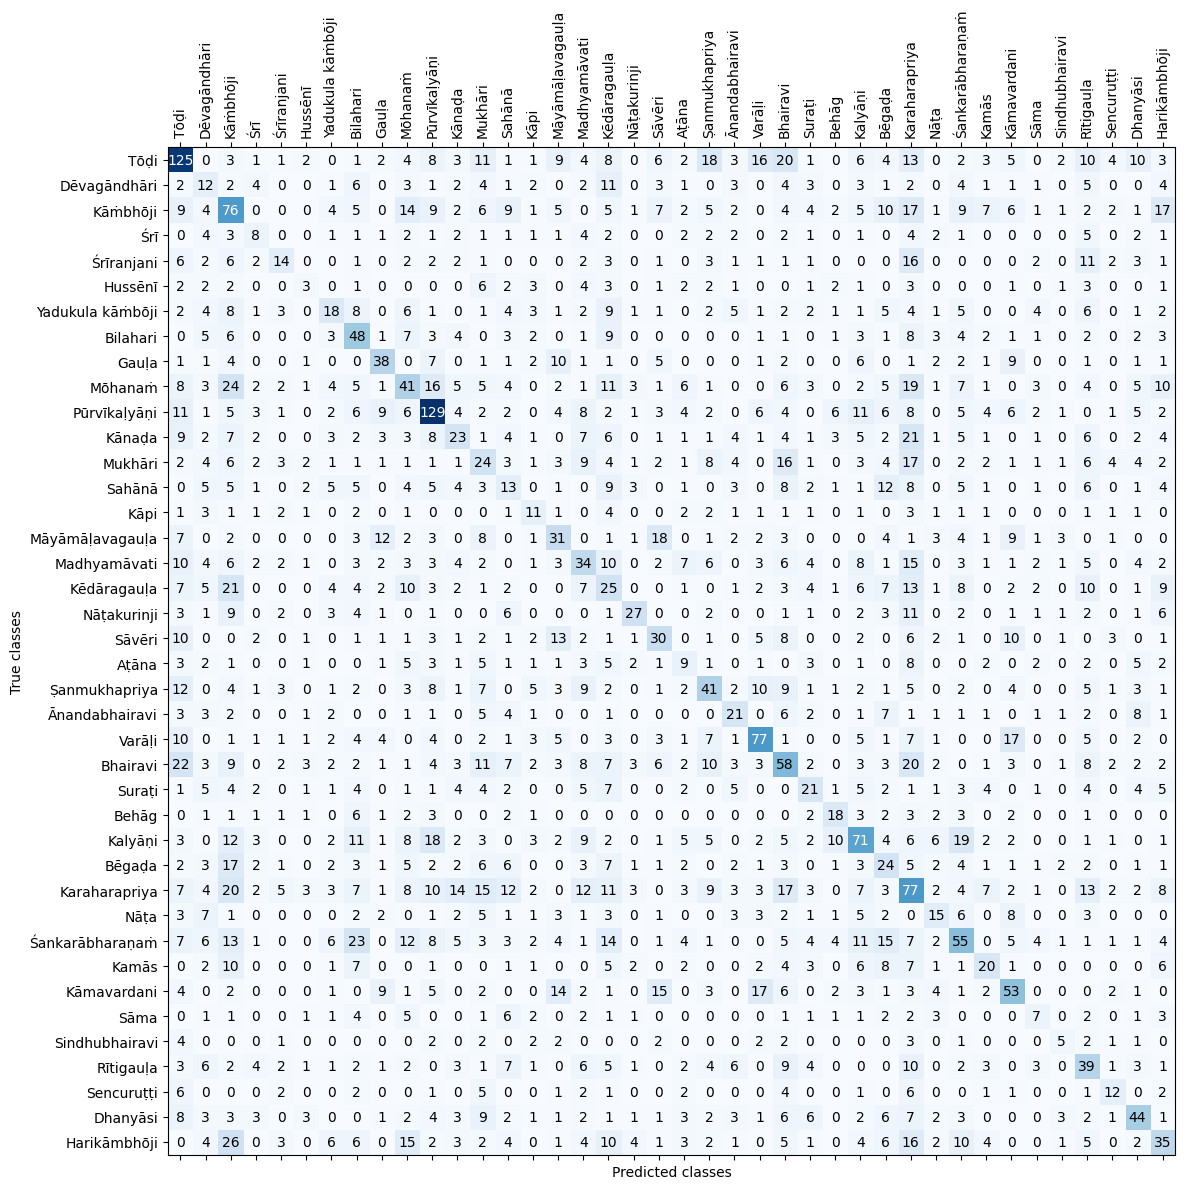

In [16]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('../plots/confusion_matrix_gradient.png', dpi=300)
plt.tight_layout()
plt.show()